# Clustering On Wholesale Customers Dataset

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

<img src="files/images.jpg">

Columns:

Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

Regions - Lisnon, Oporto or Other (Nominal)

Fresh - annual spending (m.u.) on fresh products (Continuous)

Frozen - annual spending (m.u.) on Frozen products (Continuous)

Grocery - annual spending (m.u.) on Grocery products (Continuous)

Milk - annual spending (m.u.) on milk products (Continuous)

Detergents_Paper - annual spending (m.u.) on detergents and paper products (Continuous)

Delicassen - annual spending (m.u.) on delicatessen products (Continuous)

In [1]:
#importing packages
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
wholesale = pd.read_csv('Wholesale customers data.csv')
wholesale.head() #Source: Kaggle

,Channel,Region,Fresh,Frozen,Grocery,Milk,Detergents_Paper,Delicassen
0,2,3,12669,214,7561,9656,2674,1338
1,2,3,7057,1762,9568,9810,3293,1776
2,2,3,6353,2405,7684,8808,3516,7844
3,1,3,13265,6404,4221,1196,507,1788
4,2,3,22615,3915,7198,5410,1777,5185


In [3]:
wholesale.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Milk              440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
wholesale.describe()

,Channel,Region,Fresh,Frozen,Grocery,Milk,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,3071.931818,7951.277273,5796.265909,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,4854.673333,9503.162829,7380.377175,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,25.000000,3.000000,55.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,742.250000,2153.000000,1533.000000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,1526.000000,4755.500000,3627.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,3554.250000,10655.750000,7190.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,60869.000000,92780.000000,73498.000000,40827.000000,47943.000000


In [5]:
m = wholesale.iloc[:, [2, 3]].values #Choosing columns fresh and frozen

# EDA

In [6]:
data_copy = wholesale.copy()

In [7]:
data_copy['Channel'] = data_copy['Channel'].map({1:'Horeca', 2:'Retail'}) #Defining the channels
#Horeca- Hotel/Restaurant/Cafe

In [8]:
data_copy['Region'].replace([1,2,3],['Lisbon','Oporto','other'],inplace=True) #Naming the categories

In [9]:
data_copy.head()

,Channel,Region,Fresh,Frozen,Grocery,Milk,Detergents_Paper,Delicassen
0,Retail,other,12669,214,7561,9656,2674,1338
1,Retail,other,7057,1762,9568,9810,3293,1776
2,Retail,other,6353,2405,7684,8808,3516,7844
3,Horeca,other,13265,6404,4221,1196,507,1788
4,Retail,other,22615,3915,7198,5410,1777,5185


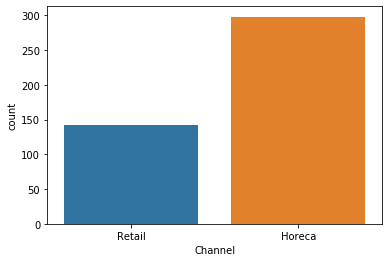

In [10]:
sns.countplot(x ='Channel', data = data_copy)

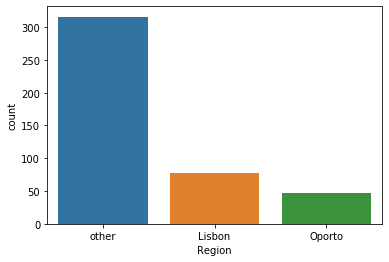

In [11]:
sns.countplot(x ='Region', data = data_copy)

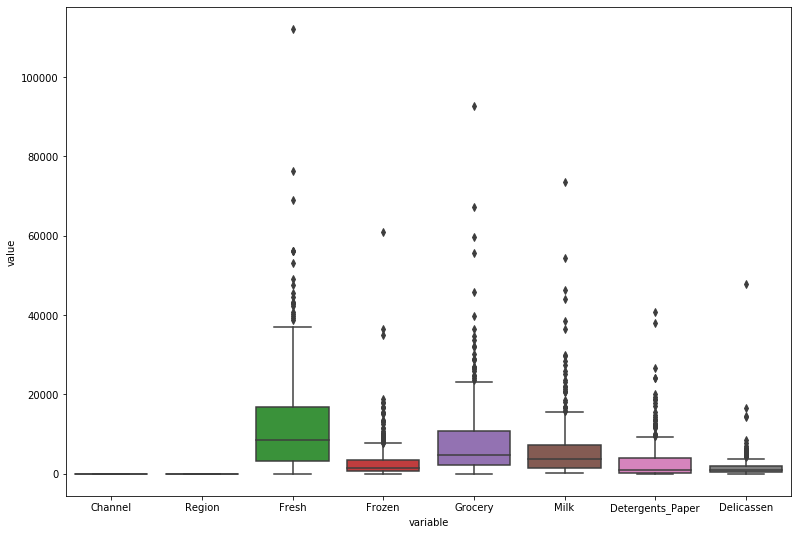

In [12]:
plt.figure(figsize=(13,9))
sns.boxplot(x='variable', y='value', data=wholesale.melt())

plt.show()

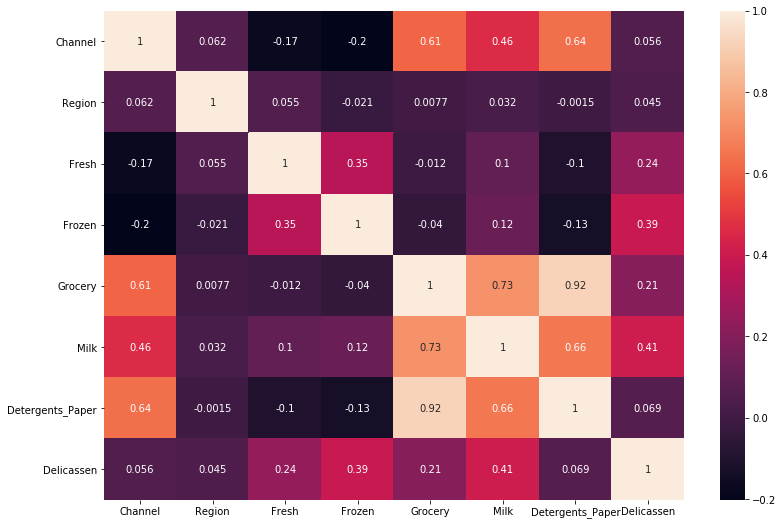

In [13]:
plt.figure(figsize=(13,9))
sns.heatmap(wholesale[wholesale.corr().index].corr(),annot=True)

# K-Means Clustering

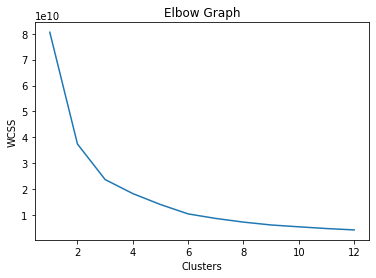

In [14]:
from sklearn.cluster import KMeans
wlist=[]
for i in range(1,13): 
     kmeanclus = KMeans(n_clusters=i, init ='k-means++', max_iter=301,  n_init=10,random_state=0 )
     kmeanclus.fit(m)
     wlist.append(kmeanclus.inertia_)  
plt.plot(range(1,13),wlist)
plt.title('Elbow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS') #within clusters sum of squared errors
plt.show()

In [15]:
#Linear After 5 clusters
kmeanclus = KMeans(n_clusters=5, init ='k-means++', max_iter=301,  n_init=10,random_state=0 )
kmeanclus.fit(m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=301,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
ykmeans = kmeanclus.fit_predict(m)
ykmeans

array([1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 1, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 3, 0, 2, 1, 1, 3,
       3, 3, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3,
       3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 1, 3, 4, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 1, 1, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 0, 1, 1, 3, 2, 3, 3,
       1, 3, 3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 1, 1, 3, 1, 0, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 2, 3,
       1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 1, 2,
       1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 0, 0, 3, 3, 1, 3,
       3, 3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 0, 2,
       3, 1, 1, 2, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1,

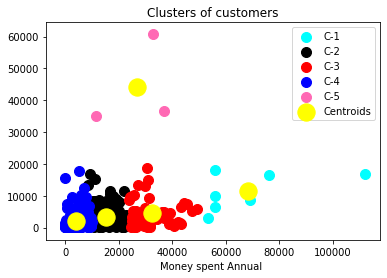

In [17]:

plt.scatter(m[ykmeans==0, 0], m[ykmeans==0, 1], s=100, c='cyan', label ='C-1')
plt.scatter(m[ykmeans==1, 0], m[ykmeans==1, 1], s=100, c='black', label ='C-2')
plt.scatter(m[ykmeans==2, 0], m[ykmeans==2, 1], s=100, c='red', label ='C-3')
plt.scatter(m[ykmeans==3, 0], m[ykmeans==3, 1], s=100, c='blue', label ='C-4')
plt.scatter(m[ykmeans==4, 0], m[ykmeans==4, 1], s=100, c='hotpink', label ='C-5')
plt.scatter(kmeanclus.cluster_centers_[:, 0], kmeanclus.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Money spent Annual ')
plt.legend()
plt.show()

# Performance Measures

In [18]:
labels= kmeanclus.fit_predict(m)

In [19]:
from sklearn.metrics import silhouette_score
coefficients_list= []
for k in range(2, 13):
    kmeanclus = KMeans(n_clusters = i, init = 'k-means++', max_iter=301, n_init=10)
    kmeanclus.fit(m)
    s_score = silhouette_score(m,kmeanclus.labels_)
    coefficients_list.append(s_score)
coefficients_list

[0.42433462633285113,
 0.42798547026056016,
 0.42507114118698,
 0.4402428632750485,
 0.4283612011949473,
 0.4356515246015506,
 0.4334836475877641,
 0.42818074074016527,
 0.4172656604093908,
 0.42292369806054364,
 0.42515905656498293]

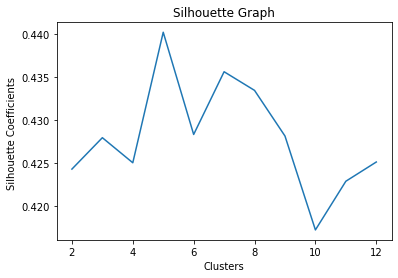

In [20]:
plt.plot(range(2, 13), coefficients_list)
plt.title('Silhouette Graph')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficients ')
plt.show() #best silhouette score at n=5

In [21]:
db=sklearn.metrics.davies_bouldin_score(m,labels)
print("Davies_bouldin Score :",db) #measure of similarity

Davies_bouldin Score : 0.6701868012446244


In [22]:
sil_avg=silhouette_score(m,labels)
print("silhouette Score : ",sil_avg) #measure of distance between clusters

silhouette Score :  0.5064190326665811


# Hierarchial Clustering

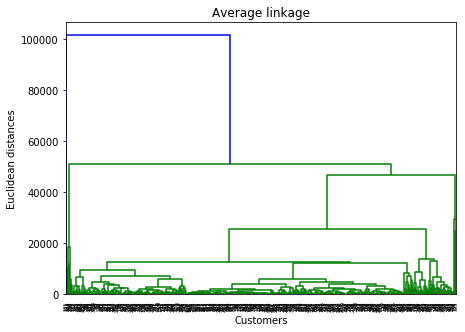

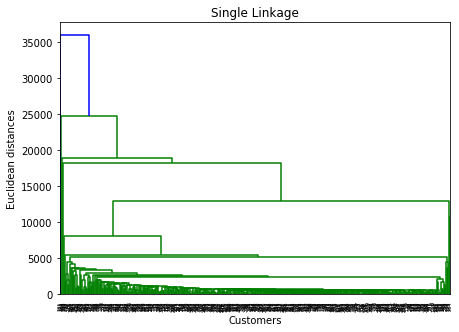

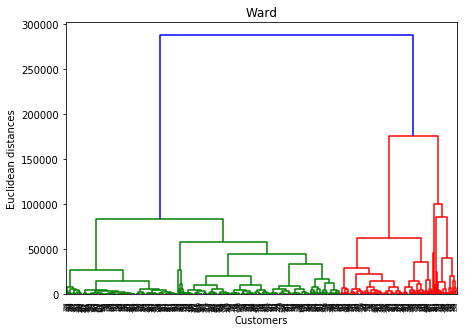

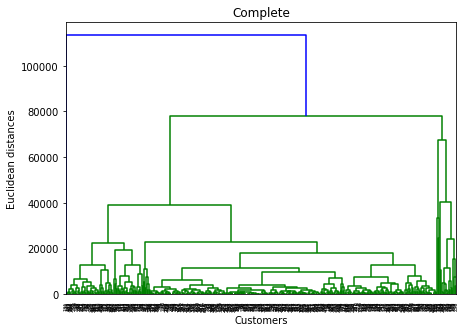

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
link = linkage(m, 'average') #consider average dist between clusters
figure = plt.figure(figsize=(7,5 ))
plt.title('Average linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dando = dendrogram(link)

link = linkage(m, 'single') #consider shortest dist between clusters
figure = plt.figure(figsize=(7, 5))
plt.title('Single Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dando = dendrogram(link)

link = linkage(m, 'ward') #consider wcss dist between clusters
figure = plt.figure(figsize=(7, 5))
plt.title('Ward')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dando = dendrogram(link)

link = linkage(m, 'complete') #consider farthest dist between clusters
figure = plt.figure(figsize=(7, 5))
plt.title('Complete')
dando = dendrogram(link)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
#Ward Linkage
from sklearn.cluster import AgglomerativeClustering
hierc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
yhier=hierc.fit_predict(m)

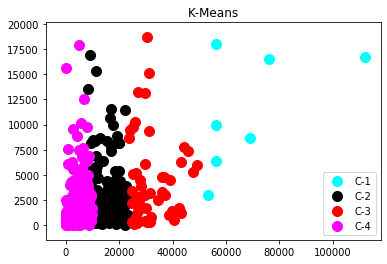

In [36]:
plt.scatter(m[ykmeans==0, 0], m[ykmeans==0, 1], s=100, c='cyan', label ='C-1')
plt.scatter(m[ykmeans==1, 0], m[ykmeans==1, 1], s=100, c='black', label ='C-2')
plt.scatter(m[ykmeans==2, 0], m[ykmeans==2, 1], s=100, c='red', label ='C-3')
plt.scatter(m[ykmeans==3, 0], m[ykmeans==3, 1], s=100, c='magenta', label ='C-4')
plt.title('K-Means')
plt.legend()
plt.show()

In [34]:
#Single Linkage
hierc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
yhier=hierc.fit_predict(m)

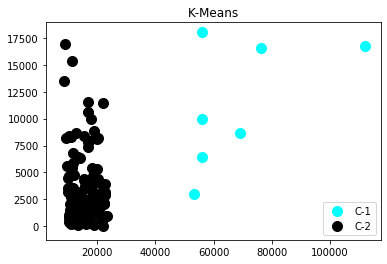

In [35]:
plt.scatter(m[ykmeans==0, 0], m[ykmeans==0, 1], s=100, c='cyan', label ='C-1')
plt.scatter(m[ykmeans==1, 0], m[ykmeans==1, 1], s=100, c='black', label ='C-2')
plt.title('K-Means')
plt.legend()
plt.show()